In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd 'drive/MyDrive/Colab Notebooks/Job Skill Training/ML Practice'

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Job Skill Training/ML Practice


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [7]:
if 'dataset' in locals():
  del dataset

path = './health.csv'
dataset = pd.read_csv(path)

# First look at the data
---
First let us see what the shape of our data is, and get a quick peak at the first five rows. Then we will start to look at the statistical summary and class distribution of the given data.

In [8]:
print(f'Shape = {dataset.shape}')
print("==="*10)
print(dataset.head(5))

Shape = (203, 14)
    Age  Gender  Chest Pain  Blood Pr  Cholesterol  Blood Sugar  \
0  63.0     1.0         1.0     145.0        233.0          1.0   
1  67.0     1.0         4.0     160.0        286.0          0.0   
2  67.0     1.0         4.0     120.0        229.0          0.0   
3  37.0     1.0         3.0     130.0        250.0          0.0   
4  41.0     0.0         2.0     130.0        204.0          0.0   

   ElectroCardio  Max Heart Rate  Exercise Induced Angina  \
0            2.0           150.0                      0.0   
1            2.0           108.0                      1.0   
2            2.0           129.0                      1.0   
3            0.0           187.0                      0.0   
4            2.0           172.0                      0.0   

   ST depression ind. By exercise  Slope of the peak exercise   # of vessels  \
0                             2.3                          3.0           0.0   
1                             1.5                   

For some of these columns, the statistical summary might not make sense, for instance when the data is referencing a binary choice. It does provide insight into the mean Age, and some other values that we might be able to play around with later.

In [9]:
print(dataset.describe())

              Age     Gender  Chest Pain    Blood Pr  Cholesterol  \
count  203.000000  203.00000  203.000000  203.000000   203.000000   
mean    54.665025    0.70936    3.157635  132.566502   252.300493   
std      8.777001    0.45518    0.951694   17.897930    54.013505   
min     29.000000    0.00000    1.000000   94.000000   126.000000   
25%     48.500000    0.00000    3.000000  120.000000   218.000000   
50%     55.000000    1.00000    3.000000  130.000000   247.000000   
75%     61.000000    1.00000    4.000000  140.000000   282.000000   
max     77.000000    1.00000    4.000000  200.000000   564.000000   

       Blood Sugar  ElectroCardio  Max Heart Rate  Exercise Induced Angina  \
count   203.000000     203.000000      203.000000               203.000000   
mean      0.172414       1.123153      150.975369                 0.330049   
std       0.378674       0.994841       22.266931                 0.471393   
min       0.000000       0.000000       88.000000                 

In [10]:
print(dataset.groupby('Result').size())

Result
no     112
yes     91
dtype: int64


Now let's try some data visualization to better understand the dataset

In [31]:
from pandas.plotting import scatter_matrix
from matplotlib import figure
import seaborn as sns

sns.set()

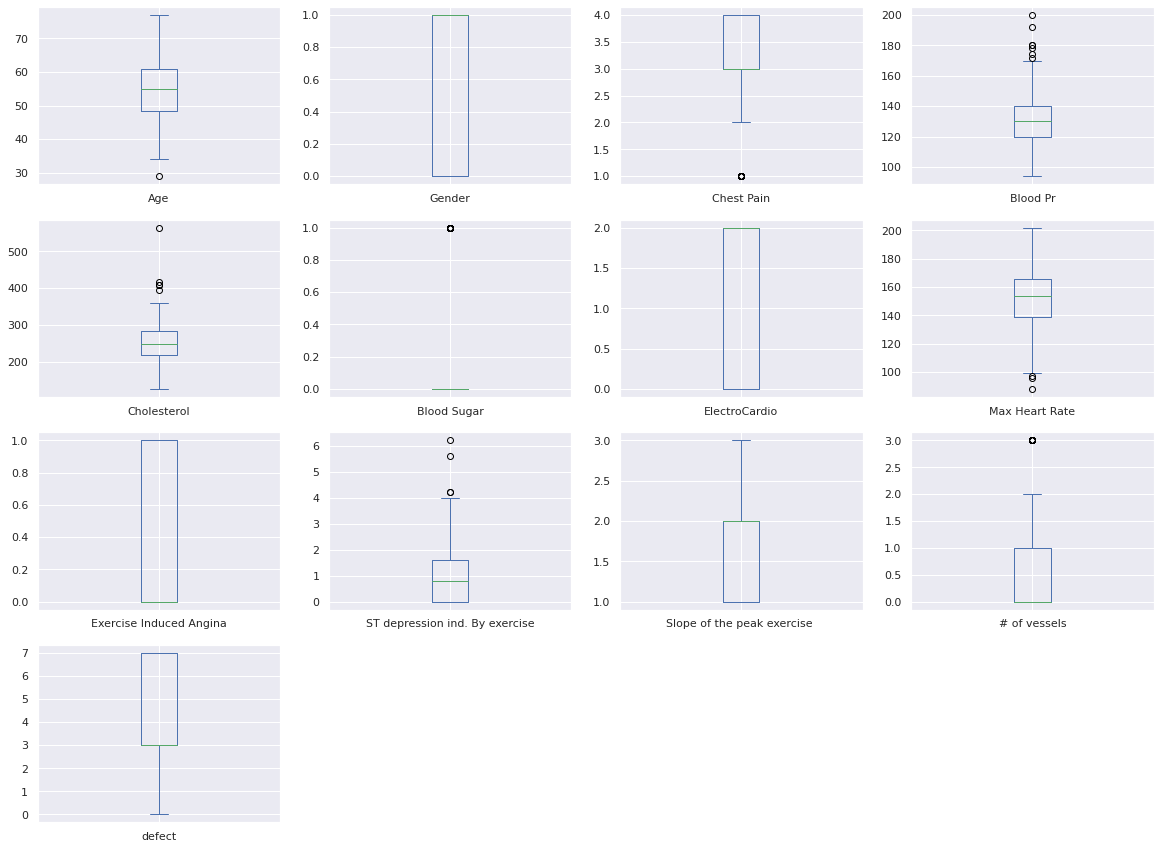

In [35]:
plt.rcParams["figure.figsize"] = (20,15)

plt.subplot(4, 4, 1)
dataset['Age'].plot(kind='box')

plt.subplot(4, 4, 2)
dataset['Gender'].plot(kind='box')

plt.subplot(4, 4, 3)
dataset['Chest Pain'].plot(kind='box')

plt.subplot(4, 4, 4)
dataset['Blood Pr'].plot(kind='box')

plt.subplot(4, 4, 5)
dataset['Cholesterol'].plot(kind='box')

plt.subplot(4, 4, 6)
dataset['Blood Sugar'].plot(kind='box')

plt.subplot(4, 4, 7)
dataset['ElectroCardio'].plot(kind='box')

plt.subplot(4, 4, 8)
dataset['Max Heart Rate'].plot(kind='box')

plt.subplot(4, 4, 9)
dataset['Exercise Induced Angina'].plot(kind='box')

plt.subplot(4, 4, 10)
dataset['ST depression ind. By exercise'].plot(kind='box')

plt.subplot(4, 4, 11)
dataset['Slope of the peak exercise '].plot(kind='box')

plt.subplot(4, 4, 12)
dataset['# of vessels'].plot(kind='box')

plt.subplot(4, 4, 13)
dataset['defect'].plot(kind='box')


plt.show()

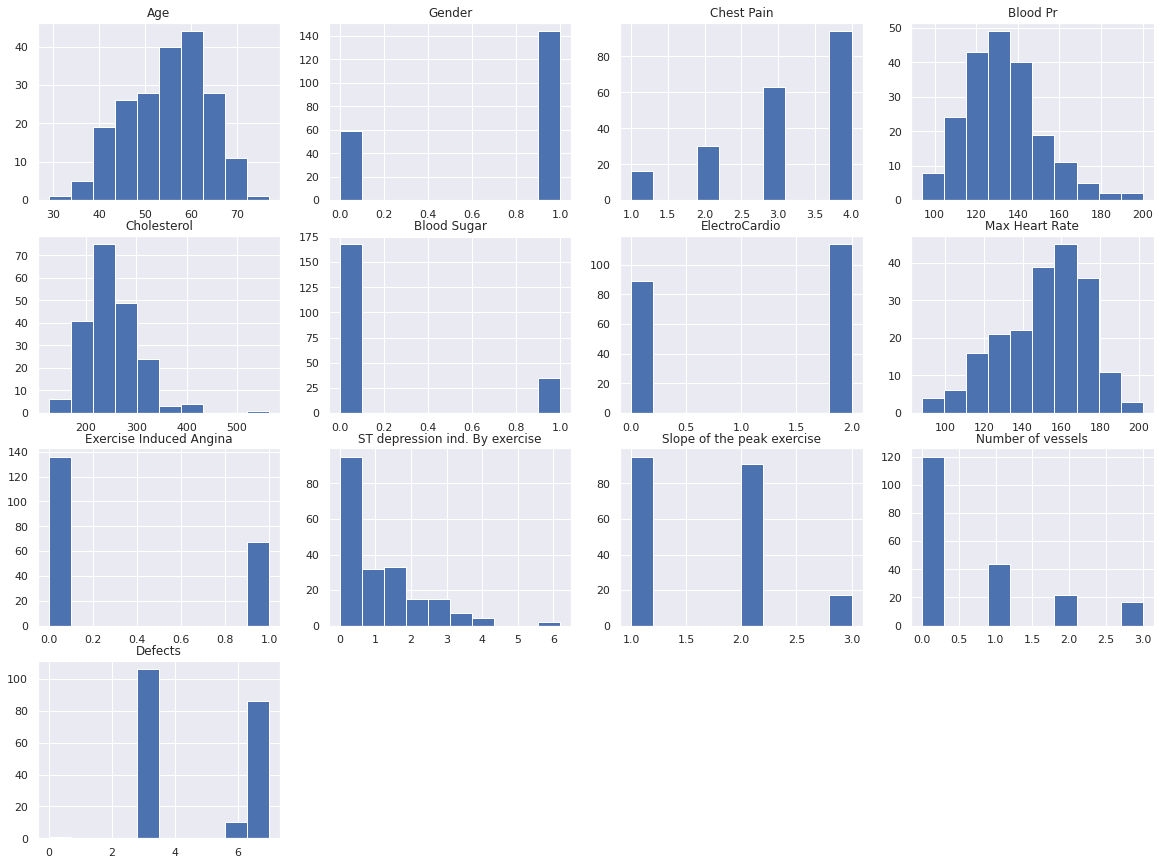

In [37]:
plt.rcParams["figure.figsize"] = (20,15)

plt.subplot(4, 4, 1)
dataset['Age'].hist()
plt.title('Age')

plt.subplot(4, 4, 2)
dataset['Gender'].hist()
plt.title('Gender')

plt.subplot(4, 4, 3)
dataset['Chest Pain'].hist()
plt.title('Chest Pain')

plt.subplot(4, 4, 4)
dataset['Blood Pr'].hist()
plt.title('Blood Pr')

plt.subplot(4, 4, 5)
dataset['Cholesterol'].hist()
plt.title('Cholesterol')

plt.subplot(4, 4, 6)
dataset['Blood Sugar'].hist()
plt.title('Blood Sugar')

plt.subplot(4, 4, 7)
dataset['ElectroCardio'].hist()
plt.title('ElectroCardio')

plt.subplot(4, 4, 8)
dataset['Max Heart Rate'].hist()
plt.title('Max Heart Rate')

plt.subplot(4, 4, 9)
dataset['Exercise Induced Angina'].hist()
plt.title('Exercise Induced Angina')

plt.subplot(4, 4, 10)
dataset['ST depression ind. By exercise'].hist()
plt.title('ST depression ind. By exercise')

plt.subplot(4, 4, 11)
dataset['Slope of the peak exercise '].hist()
plt.title('Slope of the peak exercise')

plt.subplot(4, 4, 12)
dataset['# of vessels'].hist()
plt.title('Number of vessels')

plt.subplot(4, 4, 13)
dataset['defect'].hist()
plt.title('Defects')


plt.show()

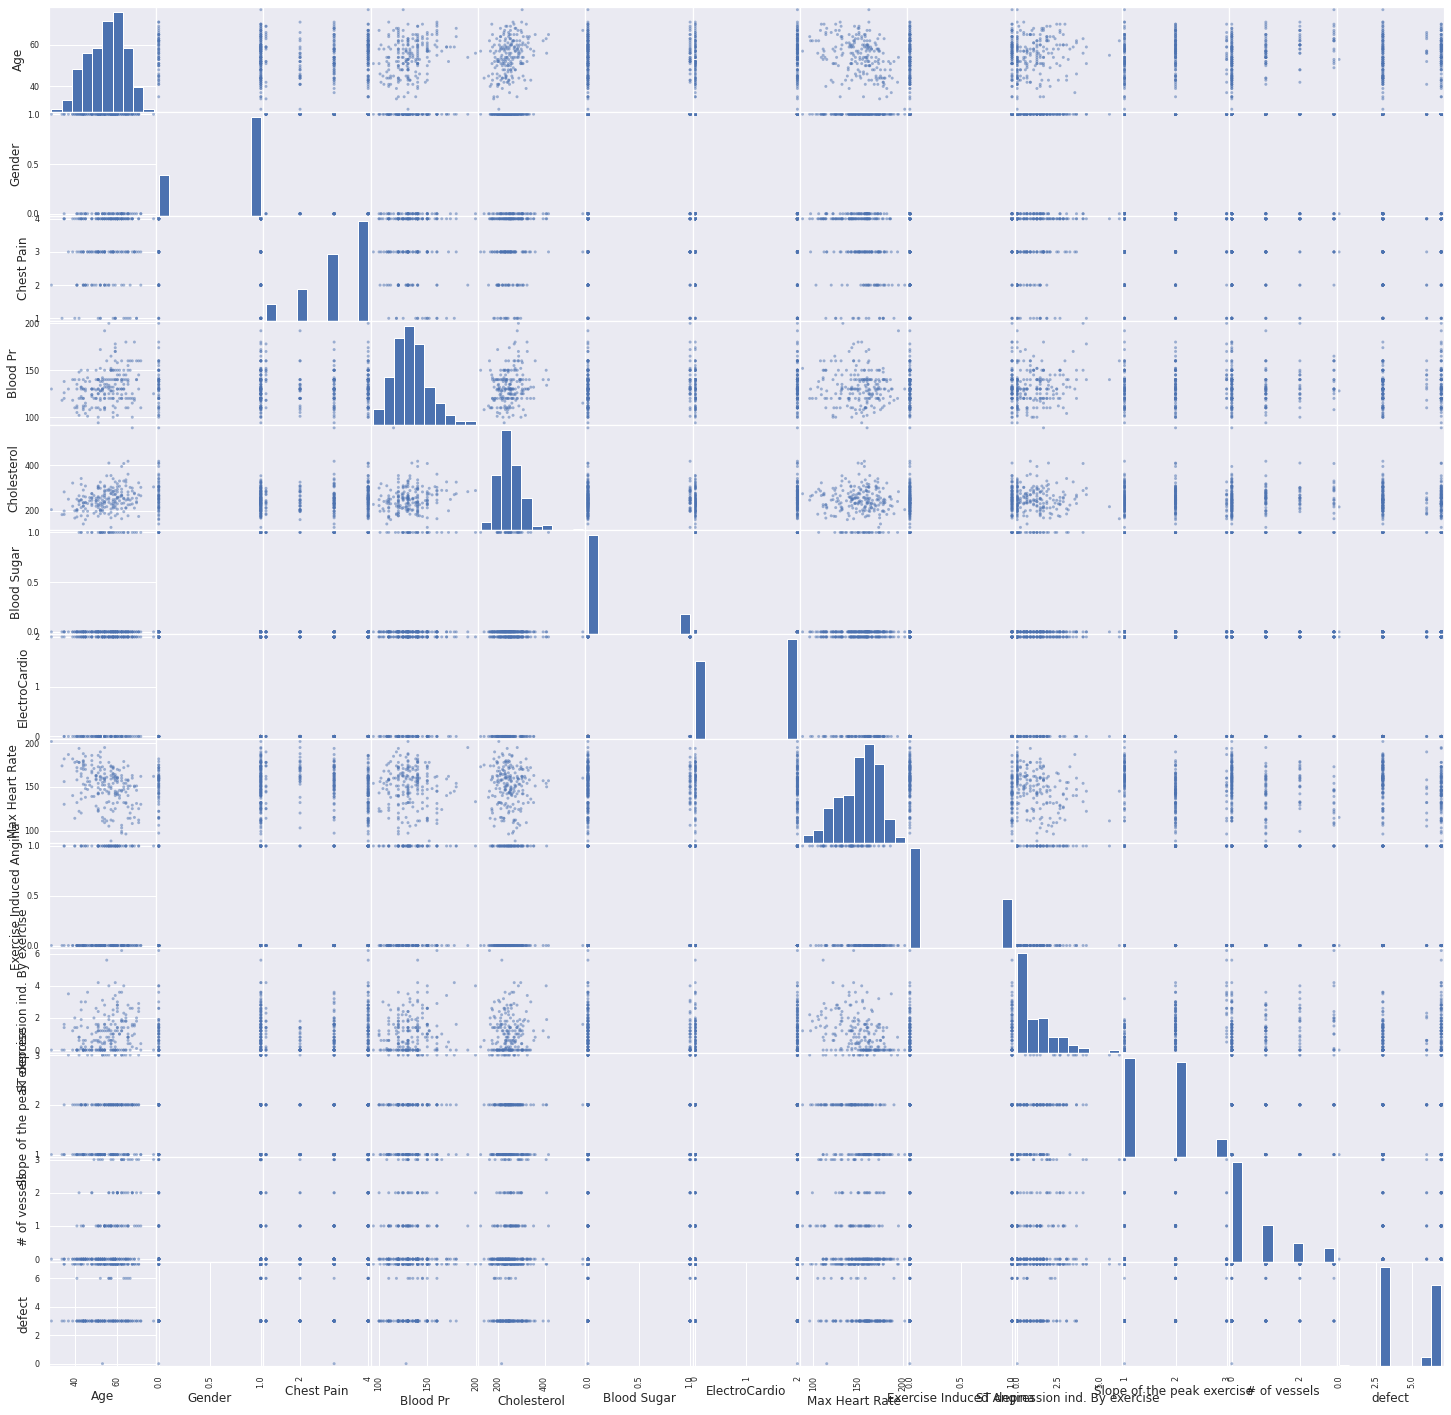

In [42]:
plt.rcParams["figure.figsize"] = (25,25)
scatter_matrix(dataset)
plt.show()

# Now let's start playing with some models

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [46]:
array = dataset.values

In [49]:
print(array[0, 0:-1])

[63.0 1.0 1.0 145.0 233.0 1.0 2.0 150.0 0.0 2.3 3.0 0.0 6.0]


In [52]:
X = array[:, 0:-1]
y = array[:, -1]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [53]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.844853 (0.081029)
LDA: 0.850735 (0.070531)
KNN: 0.683824 (0.131441)
CART: 0.752574 (0.115958)
NB: 0.857353 (0.069422)
SVM: 0.555882 (0.013235)


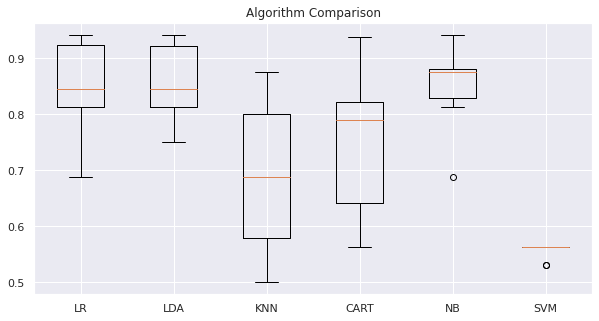

In [56]:
# Compare Algorithms
plt.rcParams["figure.figsize"] = (10,5)
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [57]:
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [58]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8780487804878049
[[20  2]
 [ 3 16]]
              precision    recall  f1-score   support

          no       0.87      0.91      0.89        22
         yes       0.89      0.84      0.86        19

    accuracy                           0.88        41
   macro avg       0.88      0.88      0.88        41
weighted avg       0.88      0.88      0.88        41

